In [1]:
import pandas as pd
import geopandas as gpd
import os
import numpy as np
import matplotlib.pyplot as plt
import mapclassify as mc
import pysal as p
import palettable.matplotlib as palmpl
from legendgram import legendgram
import seaborn as sns

In [2]:
df20 = pd.read_csv('LFB 2020 Incident data.csv')
print(f"Data frame is {df20.shape[0]:,} x {df20.shape[1]}")
df20.head(5)

Data frame is 98,568 x 39


,Unnamed: 0,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,...,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£)
0,314496,000367-01012020,2020/1/1,2020,3:46:03 PM,15,Fire,Secondary Fire,NaN,Outdoor Structure,...,Lee Green,63.0,Lee Green,NaN,NaN,1.0,1.0,1.0,1.0,339.0
1,314497,000239-01012020,2020/1/1,2020,9:13:47 AM,9,False Alarm,AFA,NaN,Dwelling,...,Stoke Newington,339.0,Stoke Newington,355.0,Stoke Newington,1.0,2.0,2.0,1.0,339.0
2,314498,000455-01012020,2020/1/1,2020,7:56:38 PM,19,False Alarm,AFA,NaN,Non Residential,...,Edmonton,277.0,Edmonton,NaN,NaN,1.0,1.0,1.0,1.0,339.0
3,314499,000105-01012020,2020/1/1,2020,1:35:32 AM,1,Fire,Primary Fire,NaN,Dwelling,...,Dagenham,339.0,Dagenham,379.0,Dagenham,1.0,2.0,2.0,4.0,1356.0
4,314500,000038-01012020,2020/1/1,2020,12:27:52 AM,0,False Alarm,False alarm - Good intent,NaN,Dwelling,...,Hornsey,211.0,Hornsey,260.0,Hornsey,1.0,2.0,2.0,1.0,339.0


In [3]:
df_fire20 = df20[df20.IncidentGroup=='Fire']
print(f"Data frame is {df_fire20.shape[0]:,} x {df_fire20.shape[1]}")
df_fire20.head(5)

Data frame is 17,401 x 39


,Unnamed: 0,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,...,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£)
0,314496,000367-01012020,2020/1/1,2020,3:46:03 PM,15,Fire,Secondary Fire,NaN,Outdoor Structure,...,Lee Green,63.0,Lee Green,NaN,NaN,1.0,1.0,1.0,1.0,339.0
3,314499,000105-01012020,2020/1/1,2020,1:35:32 AM,1,Fire,Primary Fire,NaN,Dwelling,...,Dagenham,339.0,Dagenham,379.0,Dagenham,1.0,2.0,2.0,4.0,1356.0
8,314504,000041-01012020,2020/1/1,2020,12:28:35 AM,0,Fire,Primary Fire,NaN,Dwelling,...,Southall,179.0,Southall,183.0,Southall,3.0,4.0,4.0,5.0,1695.0
10,314506,000103-01012020,2020/1/1,2020,1:31:18 AM,1,Fire,Secondary Fire,NaN,Outdoor Structure,...,West Norwood,371.0,West Norwood,NaN,NaN,1.0,1.0,1.0,1.0,339.0
16,314512,000065-01012020,2020/1/1,2020,12:55:10 AM,0,Fire,Secondary Fire,NaN,Outdoor,...,Ealing,295.0,Acton,NaN,NaN,1.0,1.0,1.0,1.0,339.0


In [4]:
df_fire20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17401 entries, 0 to 98563
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              17401 non-null  int64  
 1   IncidentNumber                          17401 non-null  object 
 2   DateOfCall                              17401 non-null  object 
 3   CalYear                                 17401 non-null  int64  
 4   TimeOfCall                              17401 non-null  object 
 5   HourOfCall                              17401 non-null  int64  
 6   IncidentGroup                           17401 non-null  object 
 7   StopCodeDescription                     17401 non-null  object 
 8   SpecialServiceType                      0 non-null      object 
 9   PropertyCategory                        17401 non-null  object 
 10  PropertyType                            17401 non-null  ob

In [5]:
borough = gpd.read_file('London_boroughs.gpkg')
borough = borough.to_crs('epsg:27700')
drop_columns = ['NONLD_AREA','ONS_INNER']
borough.drop(columns=drop_columns, axis=1,inplace=True)

ward = gpd.read_file('London_ward.gpkg')
ward = ward.to_crs('epsg:27700')
drop_columns = ['NONLD_AREA','DISTRICT']
ward.drop(columns=drop_columns, axis=1,inplace=True)

In [6]:
df_clean20= pd.DataFrame()

df_clean20['date'] = df_fire20['DateOfCall']
df_clean20['hour'] = df_fire20['HourOfCall']
df_clean20['IncidentGroup'] = df_fire20['IncidentGroup']
df_clean20['PropertyCategory'] = df_fire20['PropertyCategory']
df_clean20['StopCodeDescription'] = df_fire20['StopCodeDescription']
df_clean20['brough_code'] = df_fire20['IncGeo_BoroughCode']
df_clean20['ward_code'] = df_fire20['IncGeo_WardCode']
df_clean20['borough'] = df_fire20['ProperCase']
df_clean20 = df_clean20.reset_index()
df_clean20.drop(columns='index', axis=1,inplace=True)
print('Shape of data:',df_clean20.shape)
df_clean20.head()

Shape of data: (17401, 8)


,date,hour,IncidentGroup,PropertyCategory,StopCodeDescription,brough_code,ward_code,borough
0,2020/1/1,15,Fire,Outdoor Structure,Secondary Fire,E09000023,E05000447,Lewisham
1,2020/1/1,1,Fire,Dwelling,Primary Fire,E09000002,E05000027,Barking And dagenham
2,2020/1/1,0,Fire,Dwelling,Primary Fire,E09000009,E05000190,Ealing
3,2020/1/1,1,Fire,Outdoor Structure,Secondary Fire,E09000022,E05000432,Lambeth
4,2020/1/1,0,Fire,Outdoor,Secondary Fire,E09000009,E05000173,Ealing


In [8]:
df20 = pd.merge(left=df_clean20, right=borough, how='left', left_on='brough_code', right_on='GSS_CODE')
df20.drop(columns=['NAME'],axis=1,inplace=True)
print('Shape of data:',df20.shape)
df20.head()

Shape of data: (17401, 11)


,date,hour,IncidentGroup,PropertyCategory,StopCodeDescription,brough_code,ward_code,borough,GSS_CODE,HECTARES,geometry
0,2020/1/1,15,Fire,Outdoor Structure,Secondary Fire,E09000023,E05000447,Lewisham,E09000023,3531.706,"MULTIPOLYGON (((536691.000 178958.600, 536691...."
1,2020/1/1,1,Fire,Dwelling,Primary Fire,E09000002,E05000027,Barking And dagenham,E09000002,3779.934,"MULTIPOLYGON (((543905.400 183199.100, 543905...."
2,2020/1/1,0,Fire,Dwelling,Primary Fire,E09000009,E05000190,Ealing,E09000009,5554.428,"MULTIPOLYGON (((510253.500 182881.600, 510249...."
3,2020/1/1,1,Fire,Outdoor Structure,Secondary Fire,E09000022,E05000432,Lambeth,E09000022,2724.940,"MULTIPOLYGON (((530046.800 177893.400, 530048...."
4,2020/1/1,0,Fire,Outdoor,Secondary Fire,E09000009,E05000173,Ealing,E09000009,5554.428,"MULTIPOLYGON (((510253.500 182881.600, 510249...."


In [9]:
df20['date'] = pd.to_datetime(df20['date'], infer_datetime_format=True)
df20['hour'] = df20['hour'].astype("category")
df20['brough_code'] = df20['brough_code'].astype("category")
df20['ward_code'] = df20['ward_code'].astype("category")
df20['borough'] = df20['borough'].astype("category")
df20['GSS_CODE'] = df20['GSS_CODE'].astype("category")
df20['month'] = df20['date'].dt.month.astype("category")

In [10]:
print('Shape of cleaned data:',df20.shape)
df20.head()

Shape of cleaned data: (17401, 12)


,date,hour,IncidentGroup,PropertyCategory,StopCodeDescription,brough_code,ward_code,borough,GSS_CODE,HECTARES,geometry,month
0,2020-01-01,15,Fire,Outdoor Structure,Secondary Fire,E09000023,E05000447,Lewisham,E09000023,3531.706,"MULTIPOLYGON (((536691.000 178958.600, 536691....",1
1,2020-01-01,1,Fire,Dwelling,Primary Fire,E09000002,E05000027,Barking And dagenham,E09000002,3779.934,"MULTIPOLYGON (((543905.400 183199.100, 543905....",1
2,2020-01-01,0,Fire,Dwelling,Primary Fire,E09000009,E05000190,Ealing,E09000009,5554.428,"MULTIPOLYGON (((510253.500 182881.600, 510249....",1
3,2020-01-01,1,Fire,Outdoor Structure,Secondary Fire,E09000022,E05000432,Lambeth,E09000022,2724.940,"MULTIPOLYGON (((530046.800 177893.400, 530048....",1
4,2020-01-01,0,Fire,Outdoor,Secondary Fire,E09000009,E05000173,Ealing,E09000009,5554.428,"MULTIPOLYGON (((510253.500 182881.600, 510249....",1


In [11]:
fire_month20=df20.groupby('month').size()
incident_month20=pd.DataFrame()
month_list = np.array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov','Dec'])
incident_month20['month'] = month_list
incident_month20['Incidents']=np.array(fire_month20)
incident_month20

,month,Incidents
0,Jan,1215
1,Feb,1097
2,Mar,1357
3,Apr,1646
4,May,2127
5,Jun,1725
6,Jul,1735
7,Aug,1766
8,Sept,1585
9,Oct,1003


In [12]:
fire_hour20=df20.groupby('hour').size()
incident_hour20=pd.DataFrame()
hour_list = np.array(['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23'])
incident_hour20['hour'] = hour_list
incident_hour20['Incidents']=np.array(fire_hour20)
incident_hour20.head()

,hour,Incidents
0,0,624
1,1,509
2,2,405
3,3,305
4,4,239


In [13]:
# Hierarchical clustering
hour_month=df20.groupby('hour').month.value_counts(sort=True)
hour_month=hour_month.unstack().fillna(0)
hour_month.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
hour,,,,,,,,,,,,
0,55,39,38,57,74,71,64,62,51,37,34,42
1,45,23,43,49,53,60,48,71,46,19,31,21
2,29,24,27,32,46,38,38,46,38,29,32,26
3,25,11,24,31,42,32,23,35,27,18,24,13
4,12,12,14,16,25,34,33,27,20,11,18,17


Text(0.5, 1.0, 'Heatmap of London Fire Incident Number in 2020 (Grouped by Month and Hour)')

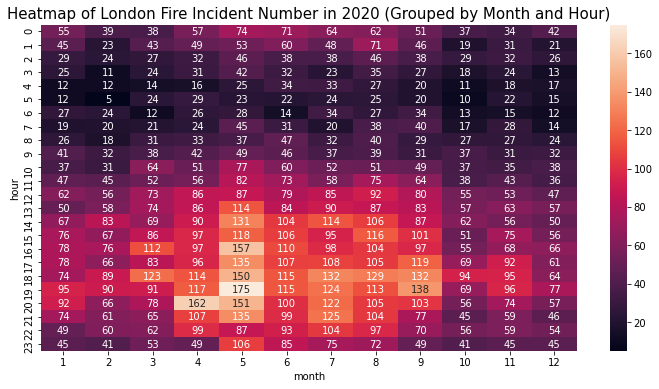

In [14]:
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(hour_month, annot=True, fmt="d",ax=ax)
plt.title('Heatmap of London Fire Incident Number in 2020 (Grouped by Month and Hour)',fontsize = 15)

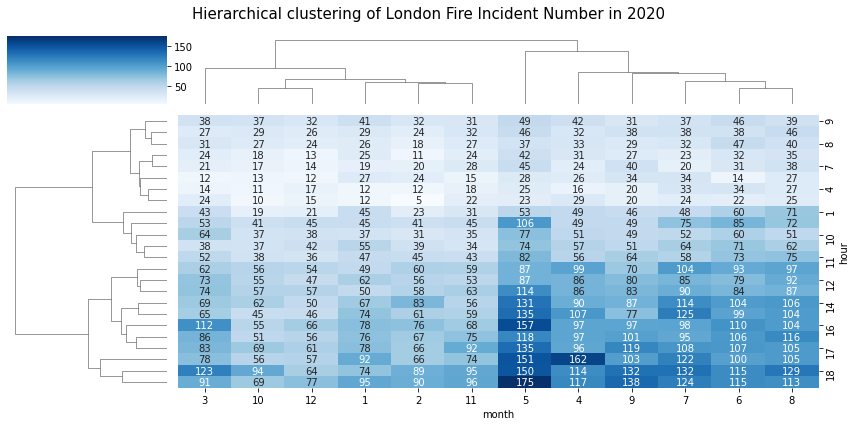

In [15]:
Hierarchical_clustering = sns.clustermap(hour_month, annot=True, fmt="d",figsize=(12,6),cmap="Blues")
Hierarchical_clustering.fig.suptitle('Hierarchical clustering of London Fire Incident Number in 2020',fontsize = 15)
plt.tight_layout()

In [16]:
dfpop= pd.read_csv('borough popualtion 2020.csv')

In [17]:
dfpop.head()

,gss_code,BoroughName,population
0,E09000002,Barking and Dagenham,214107
1,E09000003,Barnet,399007
2,E09000004,Bexley,249301
3,E09000005,Brent,327753
4,E09000006,Bromley,332752


In [18]:
borough_fire_count=pd.DataFrame()
borough_fire_count['count'] = df20.groupby('brough_code').size()
borough_fire_count.reset_index(inplace=True)
borough_fire_count.columns = ['borough','count']

fire_borough = pd.merge(left=borough, right=borough_fire_count, how='left', left_on='GSS_CODE', right_on='borough')

fire_borough_final = pd.concat([fire_borough,dfpop],axis=1)

In [19]:
fire_borough_final.head()

,NAME,GSS_CODE,HECTARES,geometry,borough,count,gss_code,BoroughName,population
0,Kingston upon Thames,E09000021,3726.117,"MULTIPOLYGON (((516401.600 160201.800, 516407....",E09000021,233,E09000002,Barking and Dagenham,214107
1,Croydon,E09000008,8649.441,"MULTIPOLYGON (((535009.200 159504.700, 535005....",E09000008,772,E09000003,Barnet,399007
2,Bromley,E09000006,15013.487,"MULTIPOLYGON (((540373.600 157530.400, 540361....",E09000006,663,E09000004,Bexley,249301
3,Hounslow,E09000018,5658.541,"MULTIPOLYGON (((521975.800 178100.000, 521967....",E09000018,705,E09000005,Brent,327753
4,Ealing,E09000009,5554.428,"MULTIPOLYGON (((510253.500 182881.600, 510249....",E09000009,776,E09000006,Bromley,332752


In [20]:
fire_borough_final['density'] = round(fire_borough_final['count']/fire_borough_final['population']*1000,2).astype('float')
print('Shape of fire_borough dataframe:',fire_borough_final.shape)
fire_borough_final.head()

Shape of fire_borough dataframe: (33, 10)


,NAME,GSS_CODE,HECTARES,geometry,borough,count,gss_code,BoroughName,population,density
0,Kingston upon Thames,E09000021,3726.117,"MULTIPOLYGON (((516401.600 160201.800, 516407....",E09000021,233,E09000002,Barking and Dagenham,214107,1.09
1,Croydon,E09000008,8649.441,"MULTIPOLYGON (((535009.200 159504.700, 535005....",E09000008,772,E09000003,Barnet,399007,1.93
2,Bromley,E09000006,15013.487,"MULTIPOLYGON (((540373.600 157530.400, 540361....",E09000006,663,E09000004,Bexley,249301,2.66
3,Hounslow,E09000018,5658.541,"MULTIPOLYGON (((521975.800 178100.000, 521967....",E09000018,705,E09000005,Brent,327753,2.15
4,Ealing,E09000009,5554.428,"MULTIPOLYGON (((510253.500 182881.600, 510249....",E09000009,776,E09000006,Bromley,332752,2.33


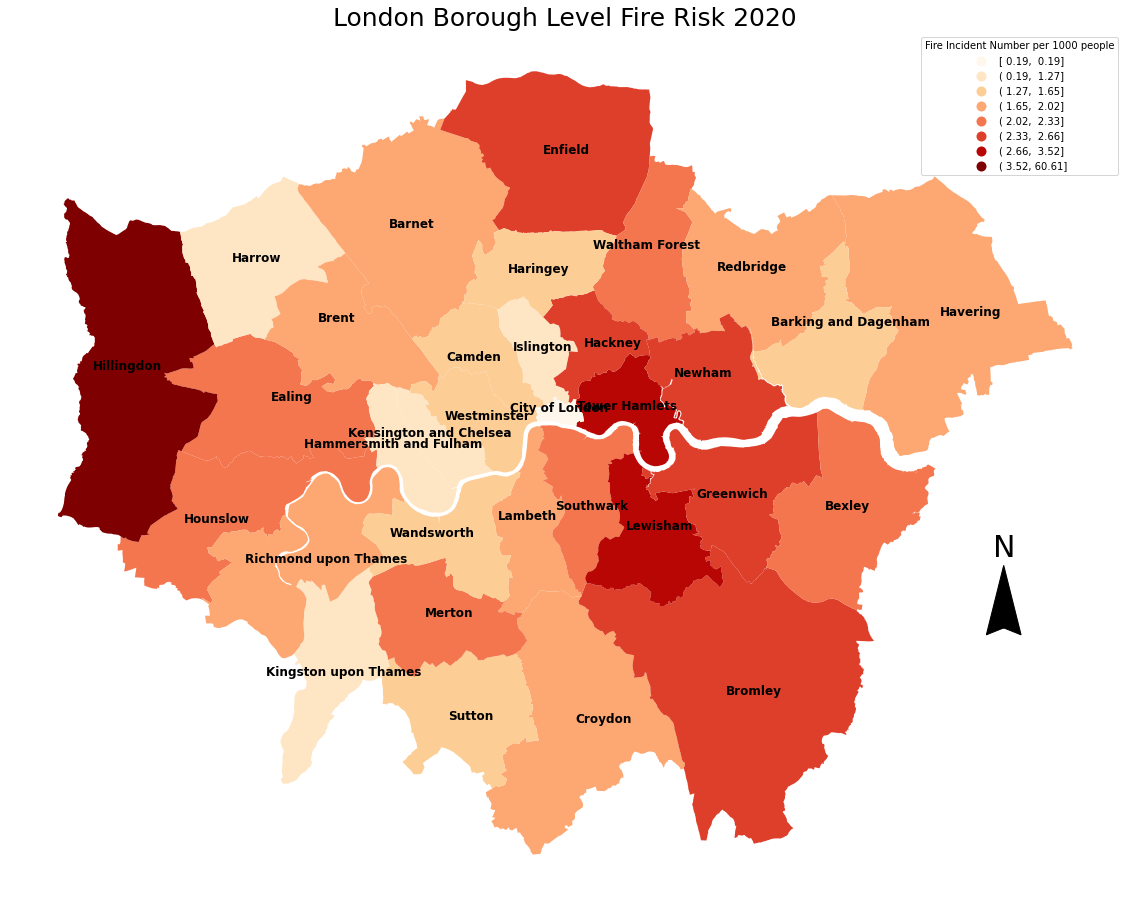

In [21]:
def London_fire_risk():
    a,ax = plt.subplots(figsize=(20,25))
    
    fire_borough_final.plot(ax=ax,column='density', cmap='OrRd',edgecolor='None',
              scheme='NaturalBreaks',k=8,legend=True)
    
    ax.set_title('London Borough Level Fire Risk 2020', fontdict={'fontsize':'25', 'fontweight':'3'})
    ax.get_legend().set_title("Fire Incident Number per 1000 people")
    f=fire_borough_final
    f['location'] = f['geometry'].apply(lambda x: x.representative_point().coords[:])
    f['location'] = [coords[0] for coords in f['location']]
    for idx, row in f.iterrows():
        plt.annotate(text=row['NAME'], xy=row['location'],horizontalalignment='center',color='black',weight = 'bold',size = 'large')
    
    ax.text(x=557400, y=173000, s='N', fontsize=30)
    ax.arrow(558000, 171500, 0, 1000, length_includes_head=True,
          head_width=2000, head_length=4000, overhang=.1, facecolor='k')
    ax.axis('off') 
    
London_fire_risk()